In [6]:
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt

In [39]:
ray_leigh = stats.rayleigh()

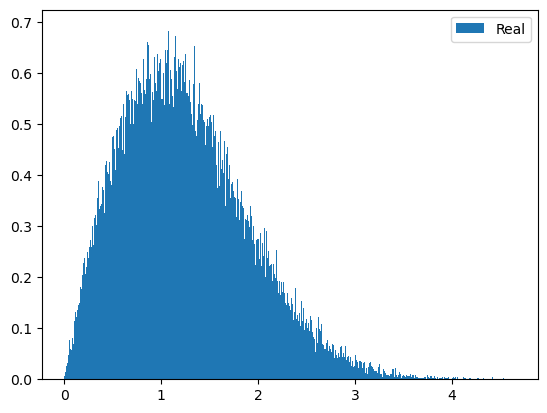

In [12]:
plt.hist(ray_leigh.rvs(100000), bins = 1000, density = True, label = "Real");
plt.legend()
plt.show()

In [91]:
from tqdm import tqdm
def generate_chain(target_pdf,length = 10):
    chain = [1]
    accepted = 0
    for i in tqdm(range(length-1)):
        current_state = chain[-1]
        Y = stats.norm(loc = current_state, scale = 1).rvs()
        ## Next lecture, we will put here some other distribution
        ## To see if we can imporve the things!!!!
        u = stats.uniform().rvs()
        if u <= target_pdf(Y)*(stats.norm(Y).pdf(current_state))/target_pdf(current_state)*(stats.norm(current_state).pdf(Y)):
            chain.append(Y)
            accepted += 1
        else:
            chain.append(current_state)
    print(f"The acceptance ratio is {accepted/length*100}")
    return chain
    

In [66]:
ray_leigh = stats.rayleigh()

In [67]:
target_pdf = lambda x : ray_leigh.pdf(x)

In [93]:
chain = generate_chain(target_pdf, length = 10000)

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:22<00:00, 447.51it/s]

The acceptance ratio is 7.51


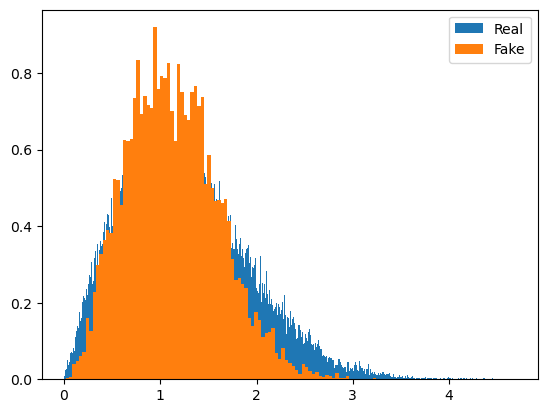

In [87]:
plt.hist(ray_leigh.rvs(100000), bins = 1000, density = True, label = "Real");
plt.hist(chain, bins = 100, density = True, label = "Fake");
plt.legend()
plt.show()